### Import libraries


In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb2hex

import sys

sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_class_colors, show_1D_umap, show_2D_umap

2024-01-29 08:22:38.328000: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Set training data load path, dataset types, save directory

In [2]:
# training data load path
training_data_dir = pathlib.Path(
    "../3.normalize_data/normalized_data/"
)

# dataset types
dataset_types = ["ic", "no_ic"]

# feature types to create umaps for
feature_types = ["CP", "DP", "CP_and_DP"]

# results directory
results_dir = pathlib.Path("results/")
results_dir.mkdir(parents=True, exist_ok=True)

### Set UMAP display settings and class colors


In [3]:
point_size = 25
alpha = 0.6
color_palette = "bright"

classes_1 = [
    "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    "Folded",
    "SmallIrregular",
    "Polylobed",
    "Metaphase",
    "Binuclear",
    "Hole",
    "Anaphase",
    "MetaphaseAlignment",
    "Elongated",
    "OutOfFocus",
]

# classes that aren't commented out will get a color for their particular class
# those that are commented out will be colored gray and labeled "other"
classes_2 = [
    # "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    # "Folded",
    # "SmallIrregular",
    # "Polylobed",
    # "Metaphase",
    # "Binuclear",
    # "Hole",
    # "Anaphase",
    # "MetaphaseAlignment",
    # "Elongated",
    # "OutOfFocus",
]

class_colors_1 = get_class_colors(classes_1, "rainbow")
class_colors_2 = get_class_colors(classes_2, "bright")

Showing UMAPs created with CP features


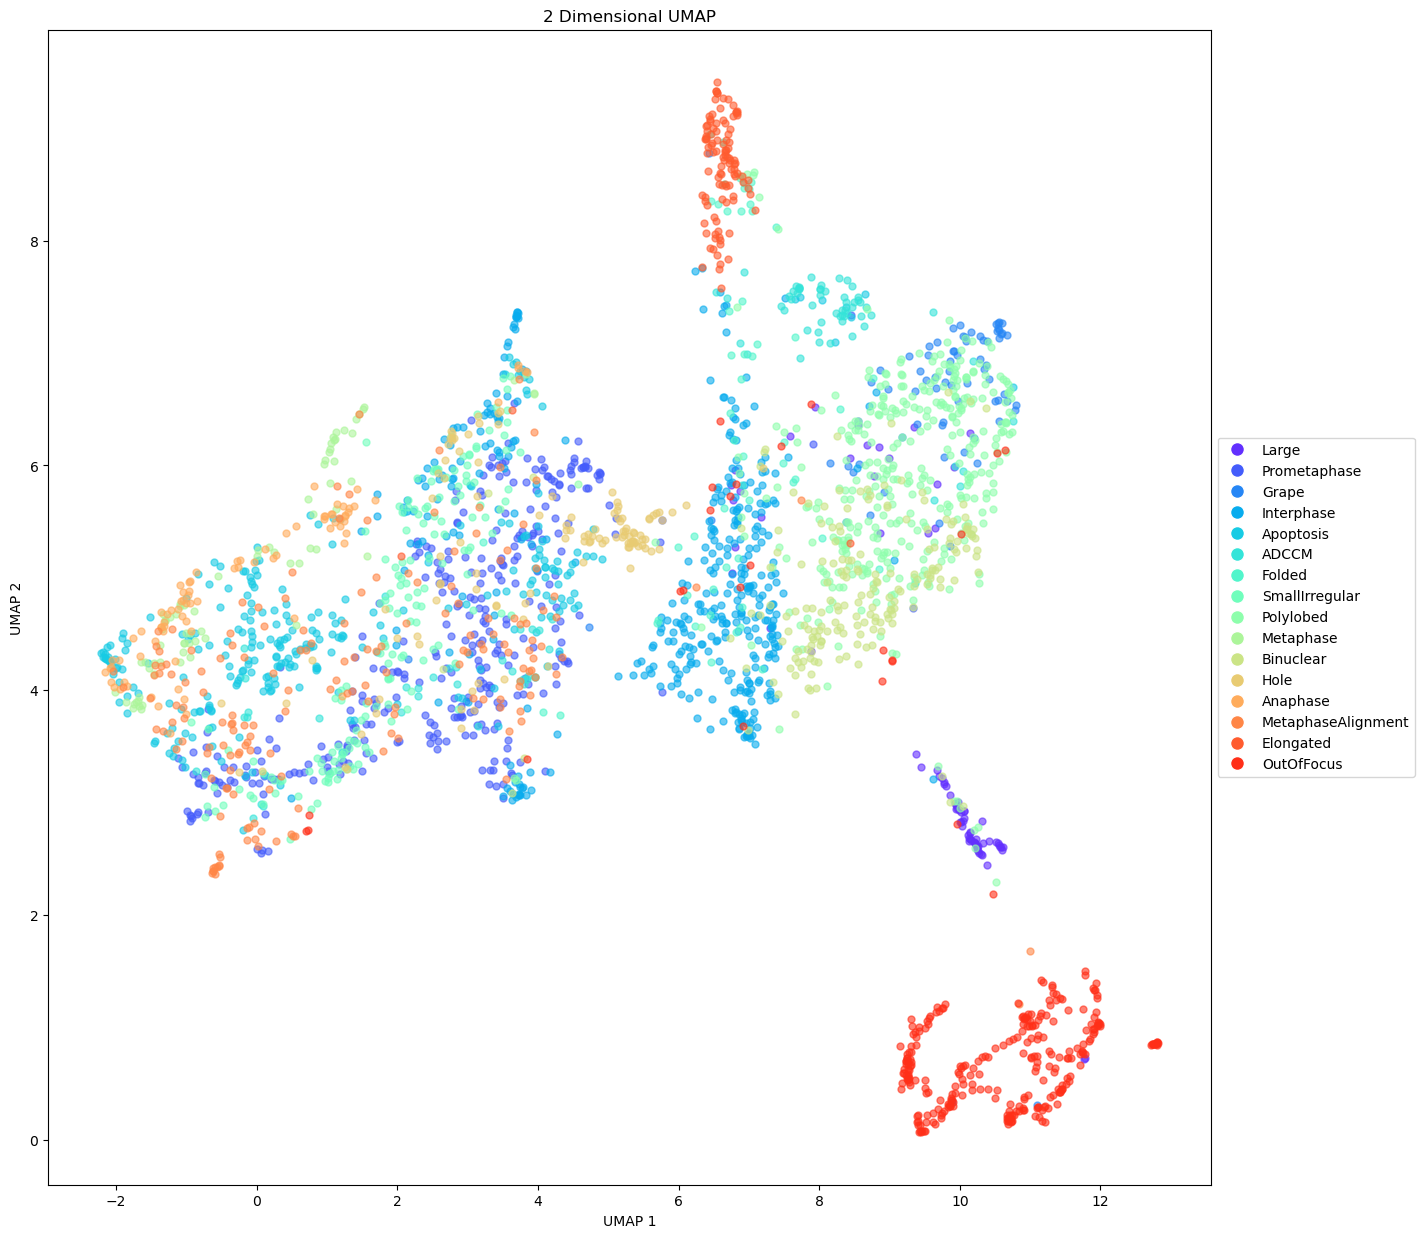

Showing UMAPs created with DP features


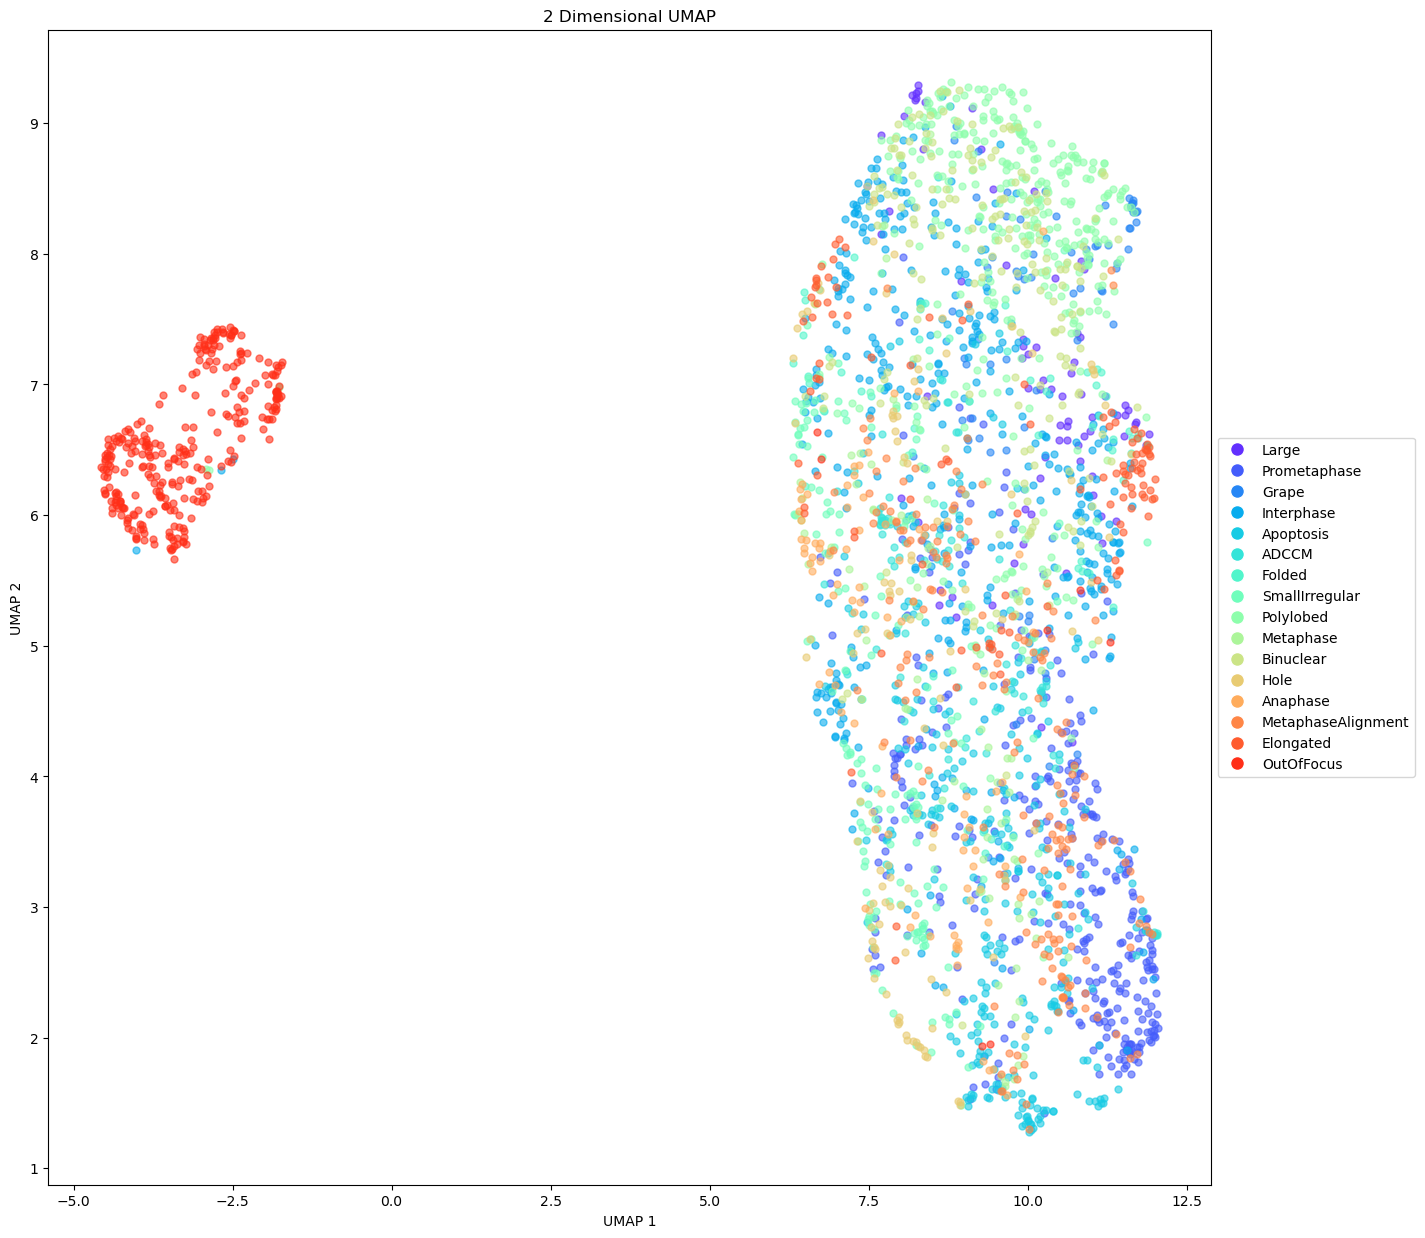

Showing UMAPs created with CP_and_DP features


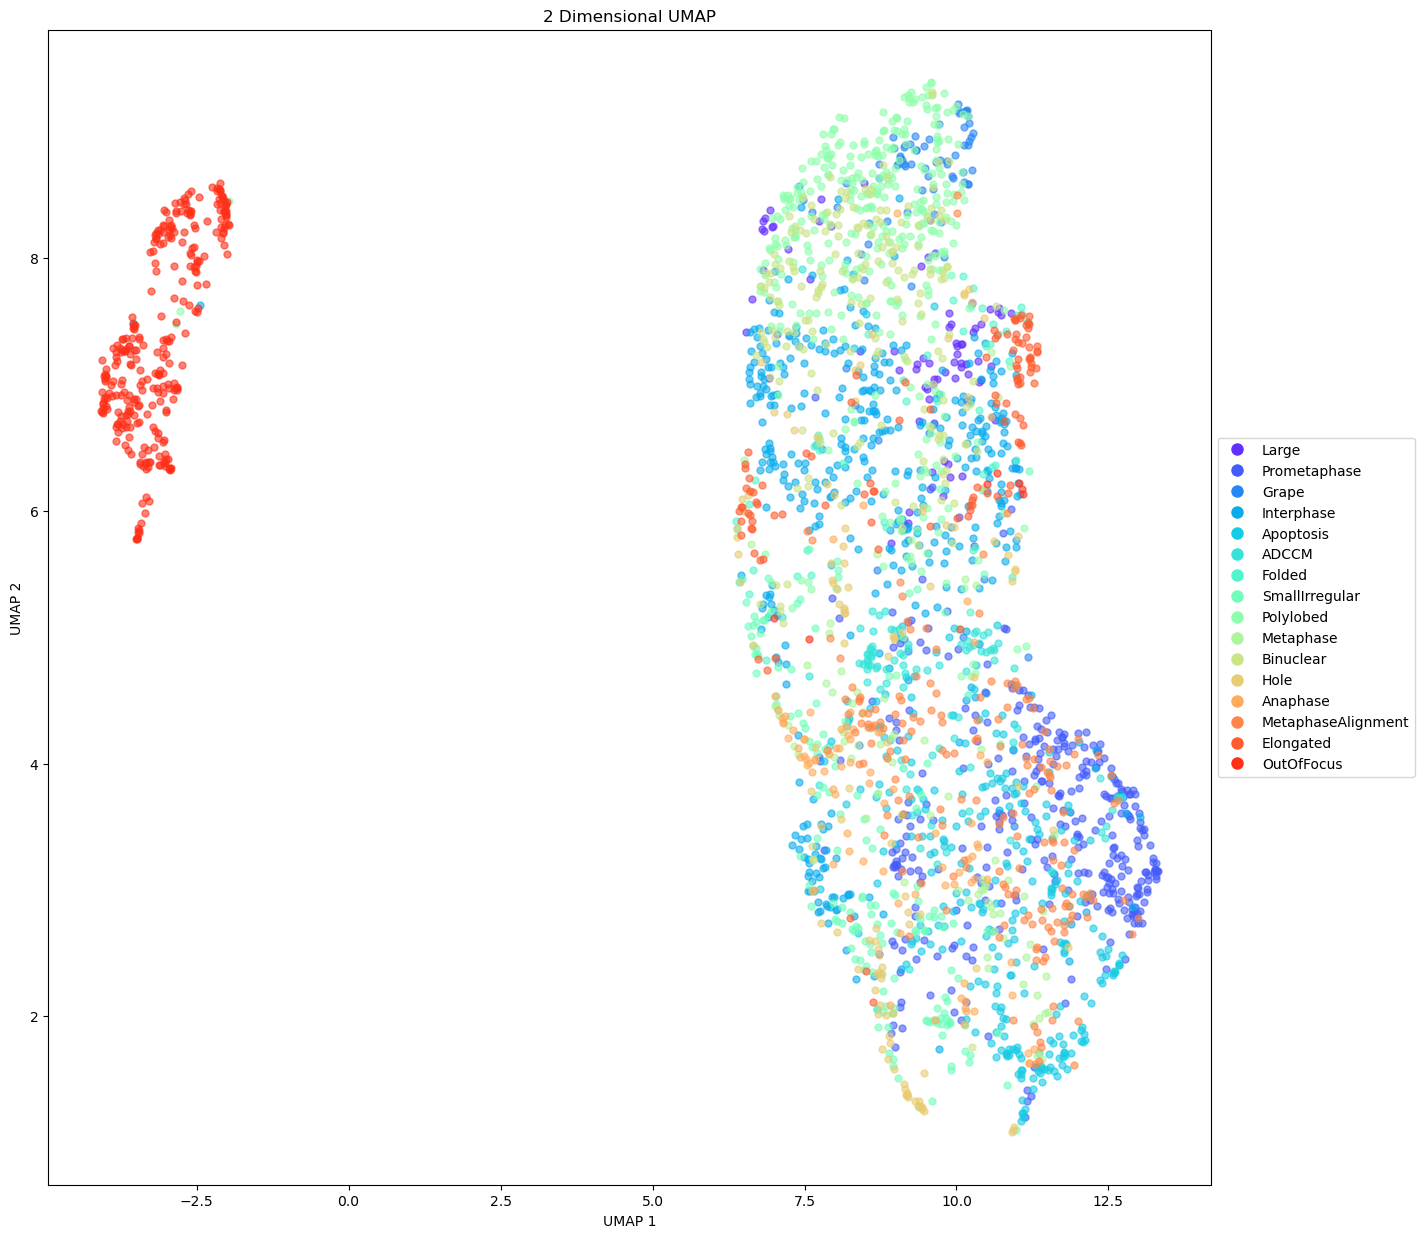

Showing UMAPs created with CP features


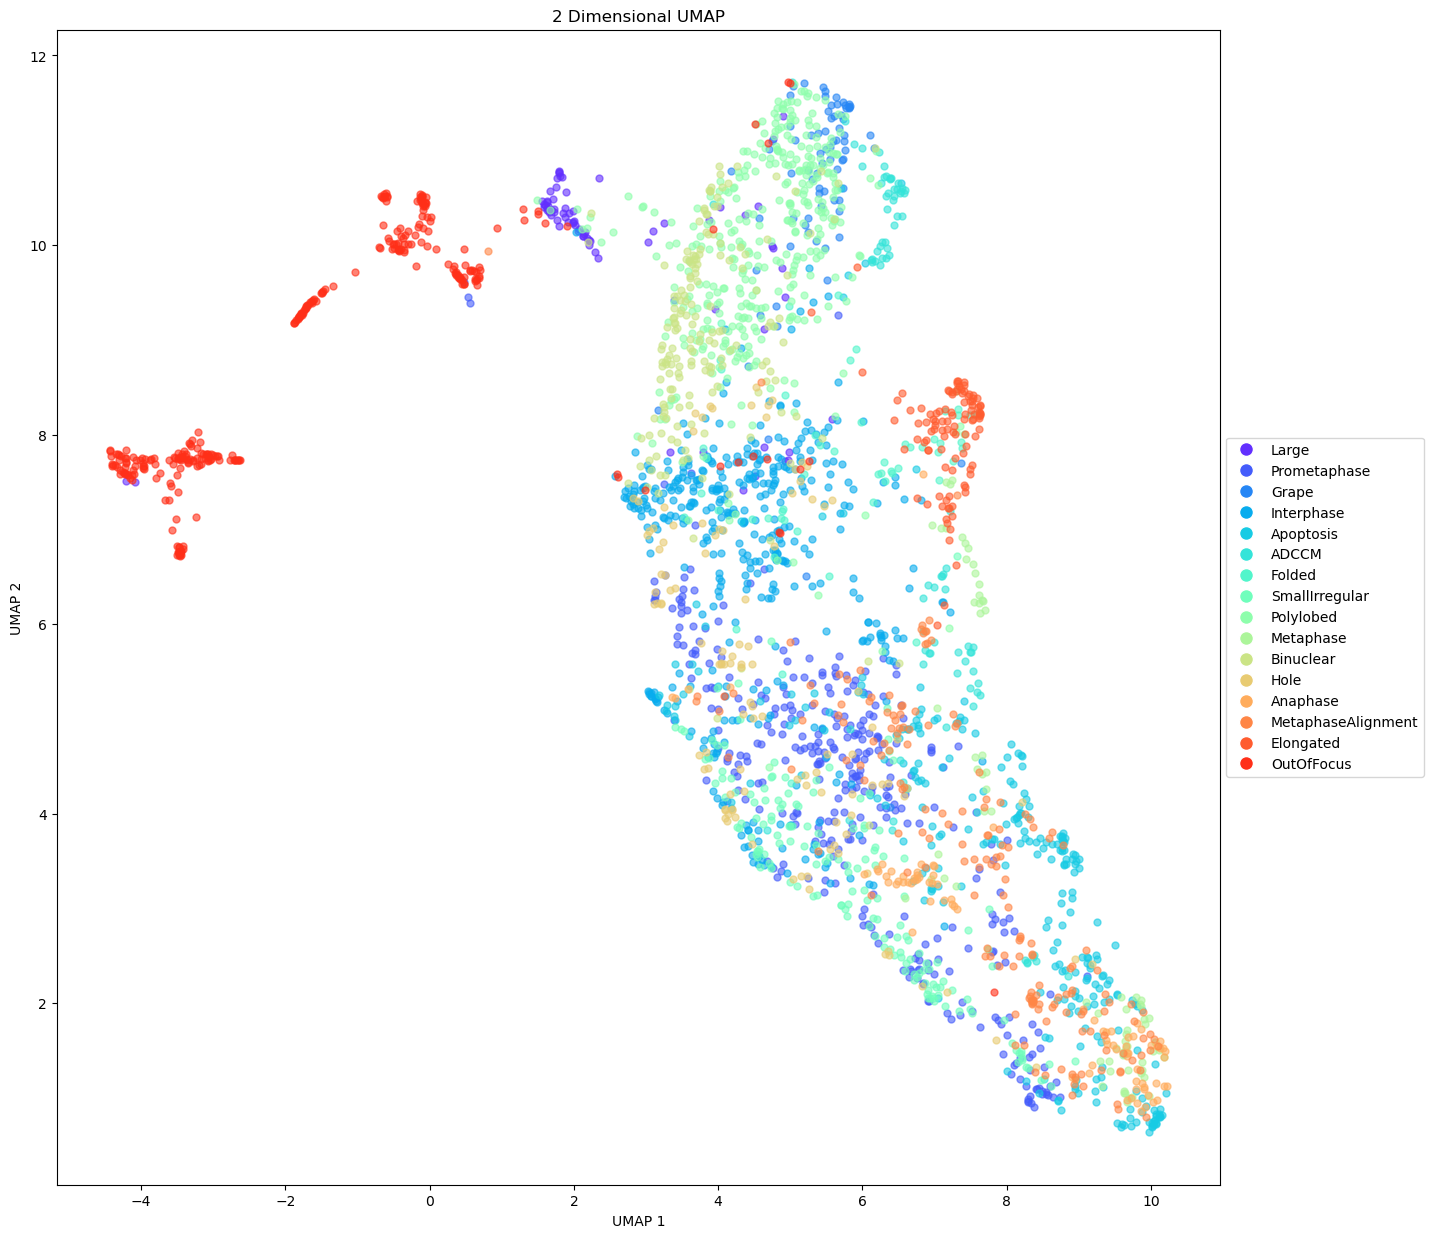

Showing UMAPs created with DP features


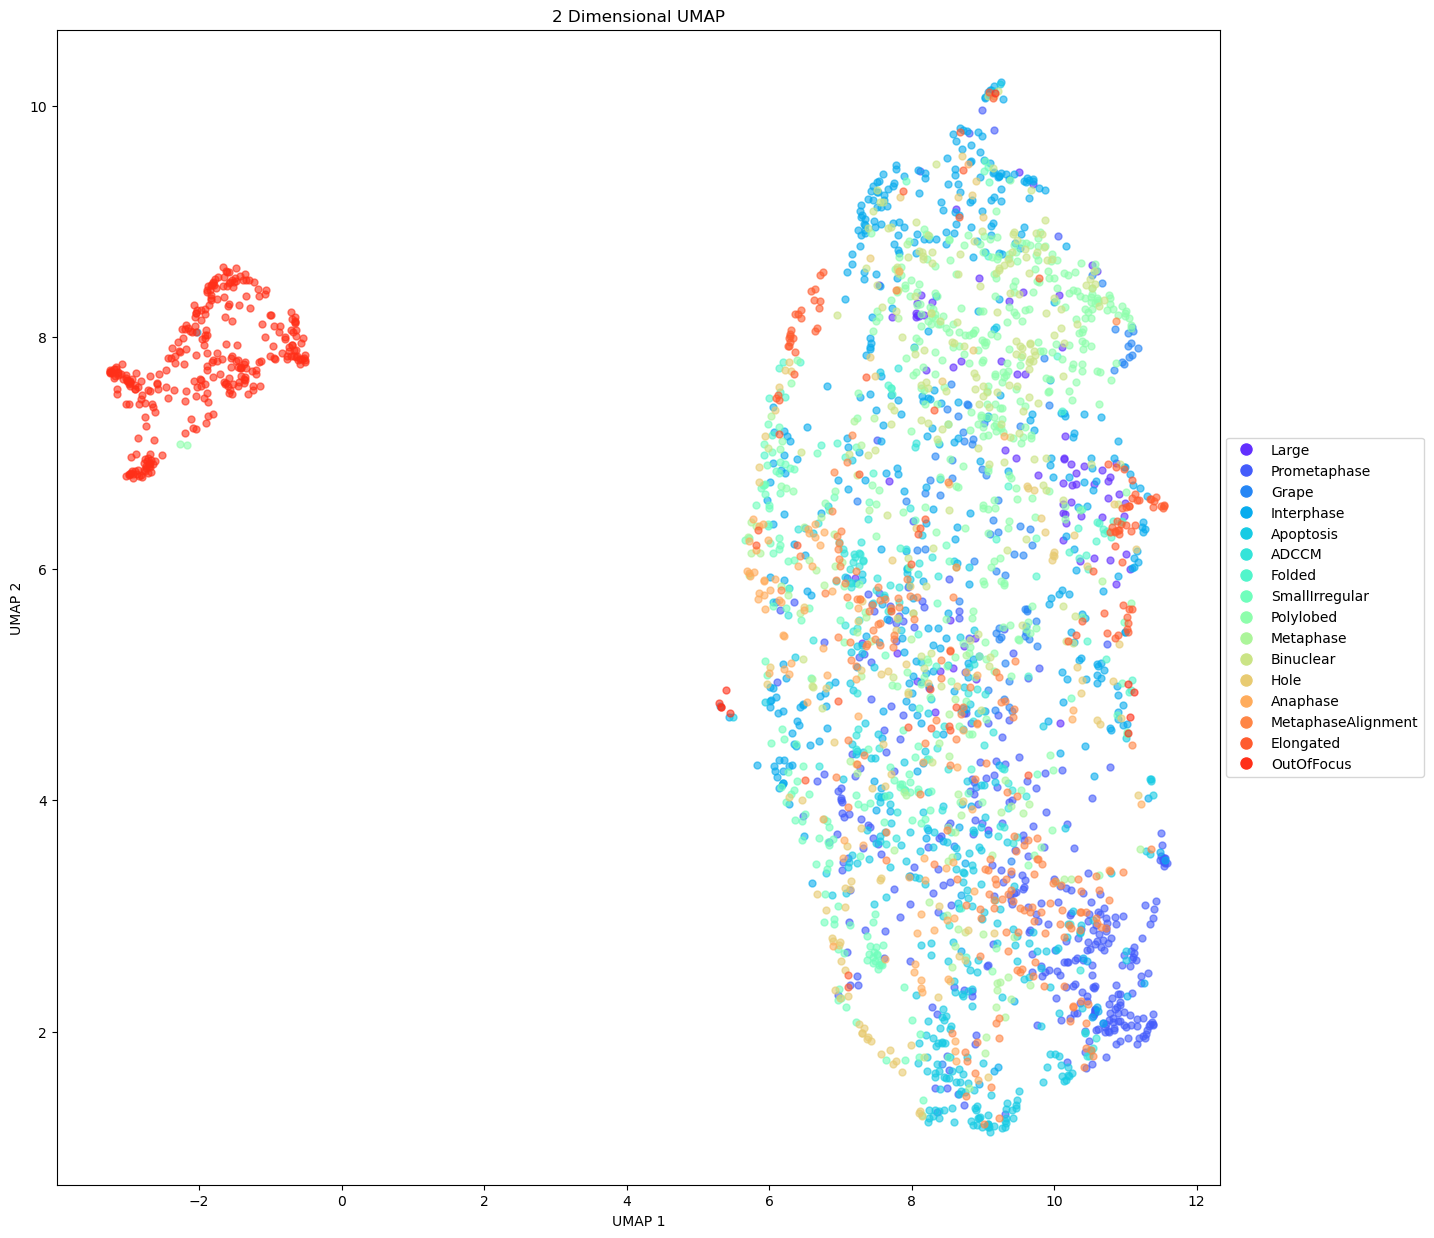

Showing UMAPs created with CP_and_DP features


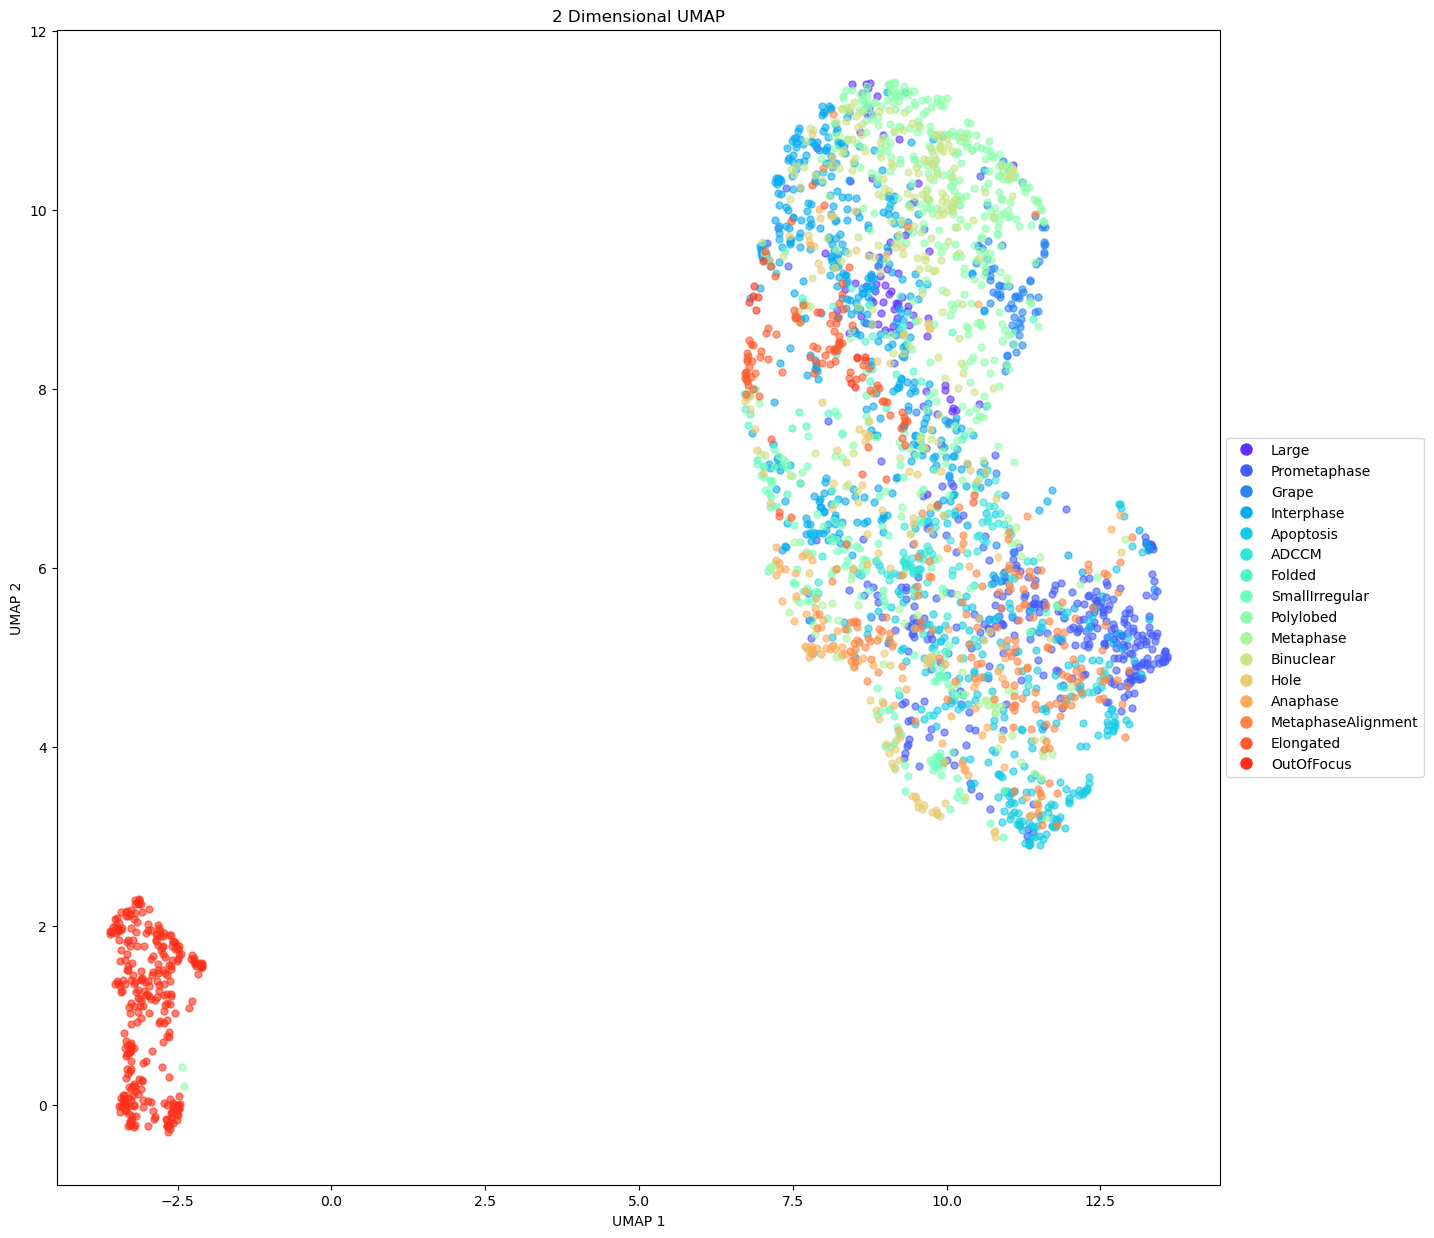

In [4]:
# list to compile cell counts tidy data
compiled_single_cell_class_counts = []

# list to compile embeddings tidy data
compiled_tidy_embeddings = []

for dataset_type in dataset_types:
    
    # load training data
    training_data_path = pathlib.Path(
        f"{training_data_dir}/training_data__{dataset_type}.csv.gz"
    )
    training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)
    
    # save single-cell counts per phenotype
    # get single-cell class counts
    single_cell_class_counts = (
        training_data["Mitocheck_Phenotypic_Class"]
        .value_counts()
        .rename_axis("Mitocheck_Phenotypic_Class")
        .reset_index(name="Single_Cell_Counts")
    )
    single_cell_class_counts["Dataset_Type"] = dataset_type
    
    # add these single cell counts to compilation
    compiled_single_cell_class_counts.append(single_cell_class_counts)
    
    # create umaps for each feature type
    for feature_type in feature_types:
        print(f"Showing UMAPs created with {feature_type} features")

        # the trainind data dataframe is split into two components:
        # metadata: info about the cell including its labeled phenotypic class, location, perturbation, etc
        # feature data: the CP, DP, or merged features for each cell
        metadata_dataframe, feature_data = split_data(training_data, feature_type)
        phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

        # show 2D umaps
        # class colors 1 - all classes included
        embeddings_2D = show_2D_umap(
            feature_data,
            phenotypic_classes,
            class_colors_1,
            point_size=point_size,
            alpha=alpha,
        )

        # add feature types column for tidy long data
        embeddings_2D["Dataset_Type"] = dataset_type
        # add feature types column for tidy long data
        embeddings_2D["Feature_Type"] = feature_type
        # add cell UUID types column for tidy long data
        embeddings_2D["Cell_UUID"] = metadata_dataframe["Cell_UUID"]
        # melt embeddings data into tidy format
        embeddings_2D = pd.melt(
            embeddings_2D,
            id_vars=["Mitocheck_Phenotypic_Class", "Dataset_Type", "Feature_Type", "Cell_UUID"],
            value_vars=["UMAP1", "UMAP2"],
            var_name="UMAP_Embedding",
            value_name="Embedding_Value",
        )

        # add these tidy embeddings to compilation
        compiled_tidy_embeddings.append(embeddings_2D)

### Save and preview tidy single-cell class counts

In [5]:
# compile tidy embeddings into one dataframe
compiled_single_cell_class_counts = pd.concat(compiled_single_cell_class_counts).reset_index(drop=True)

# save single-cell class counts
single_cell_class_counts_save_path = pathlib.Path(
    f"{results_dir}/single_cell_class_counts.csv"
)
compiled_single_cell_class_counts.to_csv(single_cell_class_counts_save_path)

# preview single-cell class counts
compiled_single_cell_class_counts

,Mitocheck_Phenotypic_Class,Single_Cell_Counts,Dataset_Type
0,Interphase,420,ic
1,Polylobed,367,ic
2,Prometaphase,345,ic
3,OutOfFocus,304,ic
4,Apoptosis,273,ic
5,Binuclear,184,ic
6,MetaphaseAlignment,175,ic
7,SmallIrregular,164,ic
8,Hole,114,ic
9,Elongated,110,ic


### Save and preview tidy embedding data


In [6]:
# compile tidy embeddings into one dataframe
compiled_tidy_embeddings = pd.concat(compiled_tidy_embeddings).reset_index(drop=True)

# save tidy embeddings
compiled_tidy_embeddings_save_path = pathlib.Path(
    f"{results_dir}/compiled_2D_umap_embeddings.csv"
)
compiled_tidy_embeddings.to_csv(compiled_tidy_embeddings_save_path)

# preview tidy embeddings data
compiled_tidy_embeddings

,Mitocheck_Phenotypic_Class,Dataset_Type,Feature_Type,Cell_UUID,UMAP_Embedding,Embedding_Value
0,Large,ic,CP,21da27ab-873a-41f4-ab98-49170cae9a2d,UMAP1,6.878828
1,Large,ic,CP,82f7949b-4ea2-45c8-8dd9-7854caf49077,UMAP1,9.861547
2,Large,ic,CP,cec7234f-fe35-4411-aded-f8112bb31219,UMAP1,6.802670
3,Large,ic,CP,43d9e7c9-c9ec-45ce-8820-048bfb896989,UMAP1,8.546513
4,Large,ic,CP,63ce6652-338e-4afd-9c77-dbc0e903bf92,UMAP1,8.440182
...,...,...,...,...,...,...
34855,OutOfFocus,no_ic,CP_and_DP,898c4f3a-08ab-4447-9307-ee4e56c02b53,UMAP2,1.080656
34856,OutOfFocus,no_ic,CP_and_DP,777fb679-c278-4895-90a0-bf3f42873f58,UMAP2,-0.069656
34857,OutOfFocus,no_ic,CP_and_DP,122e3161-b1b8-4ef3-908c-0dc898ce031f,UMAP2,1.103612
34858,OutOfFocus,no_ic,CP_and_DP,8bed4ad7-4634-41f5-a7eb-85da98a97e88,UMAP2,0.285271
